In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

# Theta Slider

<IPython.core.display.Javascript object>


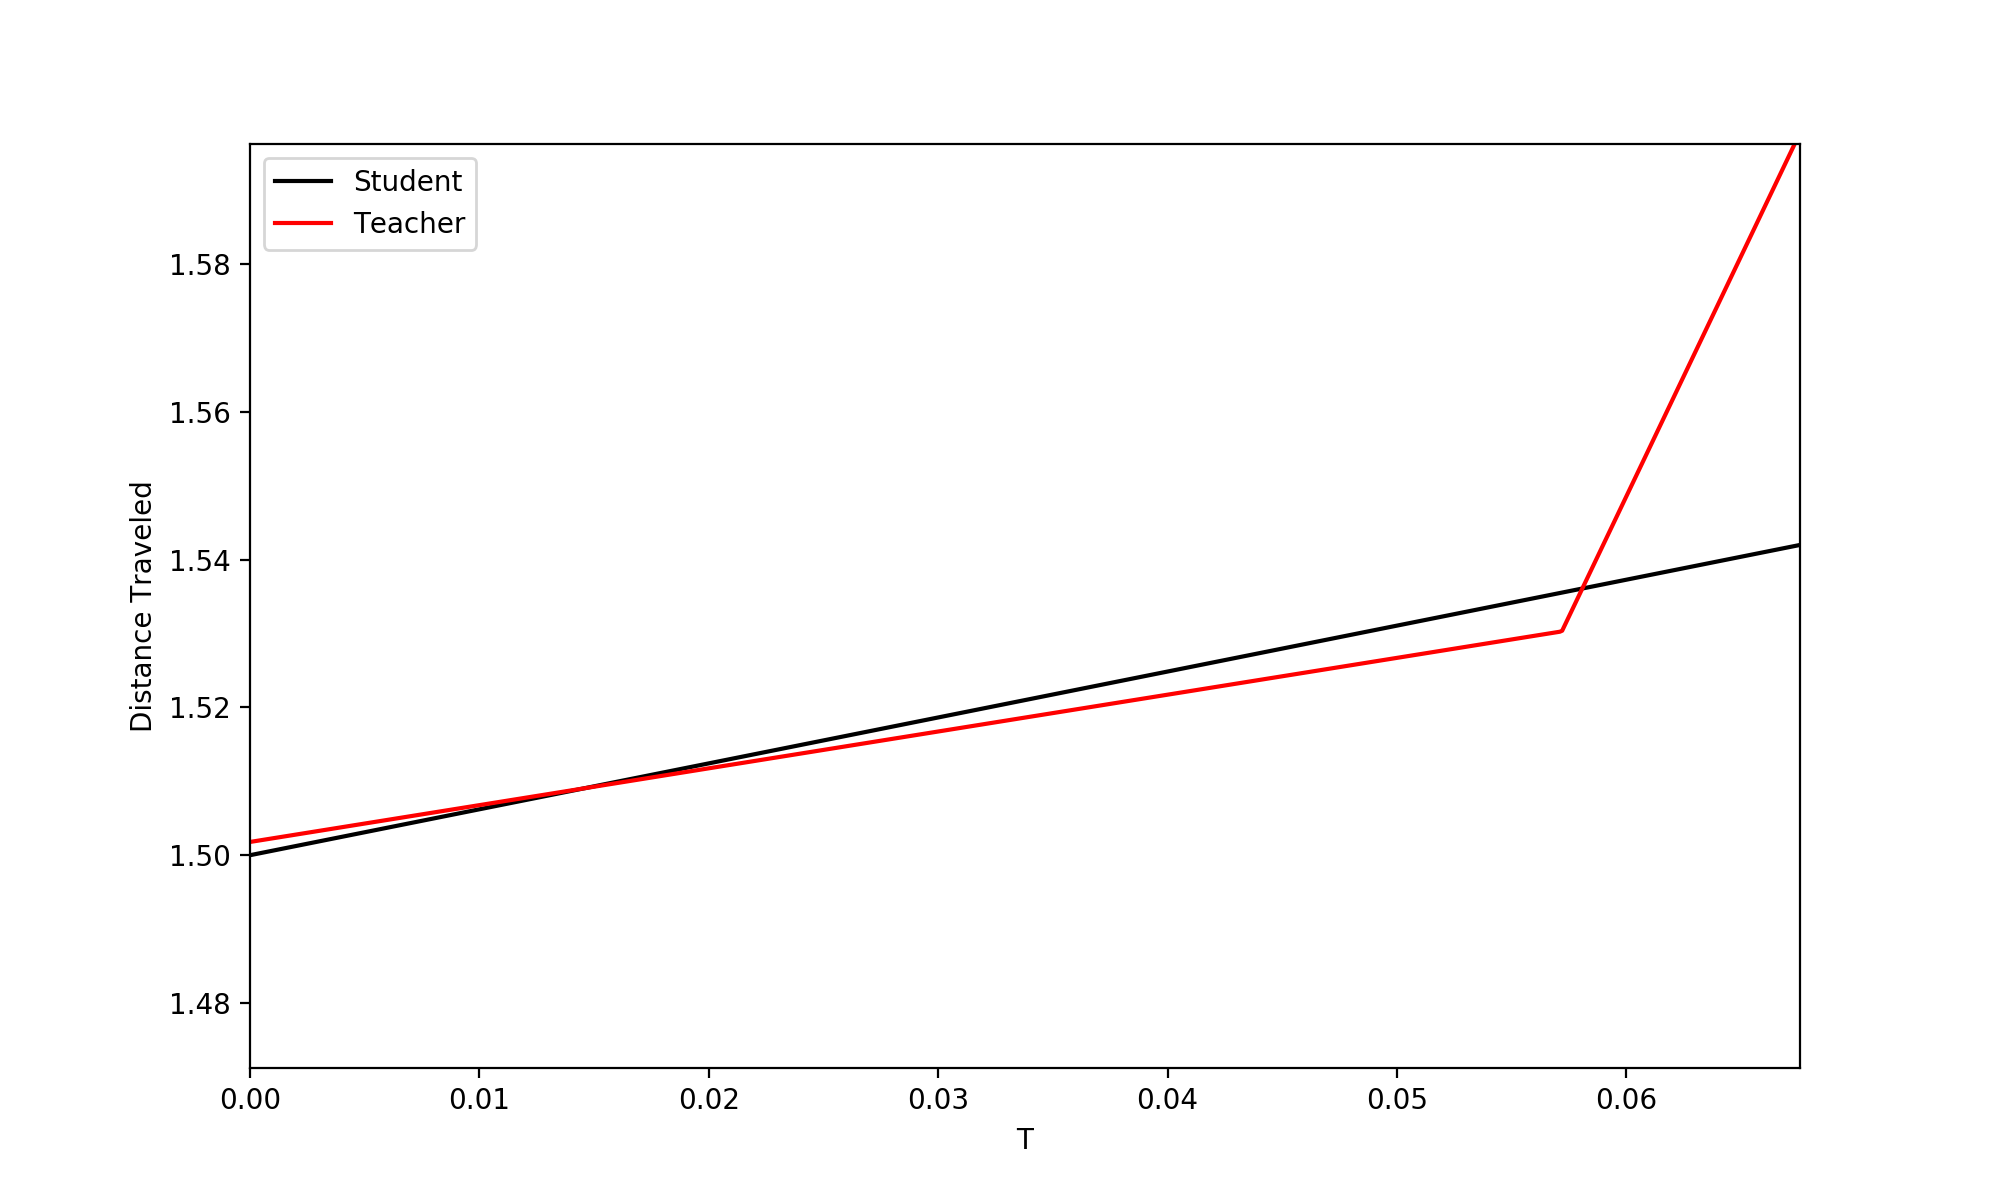

In [2]:
# constant angle
%matplotlib notebook
fig, ax = plt.subplots(figsize=(10,6))
# y1 = 2 + ((1-t) * 0.5)
t = np.linspace(0, 1, num=10000)
theta = 3 * np.pi / 4
theta = (3 * np.pi / 4 ) - theta

student = 3 * ((t*np.sqrt(2)/2) + ((1-t)*0.5) / np.cos(theta)) # (6 - 2**0.5) is the max speed of the teacher

L_student, = ax.plot(t, student, label='Student', color='k')
L_teacher, = ax.plot(t, t, label='Teacher', color='r')
ax.set_xlabel('T')
ax.set_ylabel('Distance Traveled')
# ax.axvline(threshold, color='k', linestyle=':')
ax.set(xlim=(0, 1), ylim=(0,3))
plt.legend()
plt.show()


def updatePlot(theta):
    theta = (3 * np.pi / 4 ) - theta
    # update the teacher path
    y = []
    threshold = ( ((2**0.5)/2) - (2/3) ) / ((2**0.5)/2)
    for i in t:
        if i >= threshold:
            y_turn = 1 + (6*(i-threshold)) + 0.5 + i/2
        else:
            y_turn = 1 +                     0.5 + i/2
        y_long = 2 + ((1-i) * 0.5)
        
        # add the theta term
        y_turn -= ( ((1-i)*0.5) * np.tan(theta) )
        y_long += ( ((1-i)*0.5) * np.tan(theta) )
        
        y_i = min(y_turn, y_long)
        y.append(y_i)
    # update the student path
    student = 3 * ((t*np.sqrt(2)/2) + ((1-t)*0.5) / np.cos(theta))
    
    L_student.set_ydata(student)
    L_teacher.set_ydata(y)
    fig.canvas.draw()
    
a = widgets.widgets.FloatSlider(
    value=3 * np.pi / 4,
    min=np.pi / 2,
    max=np.pi,
    step=0.001,
    description='THETA:',
    continuous_update=True,
    readout=True,
)

out = widgets.interactive_output(updatePlot, {'theta': a})
widgets.HBox([a, out])

# 2D Color Plot

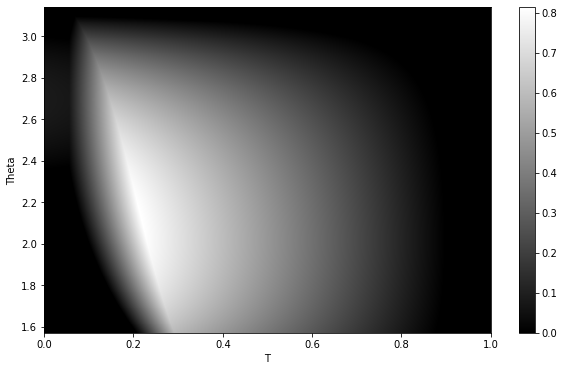

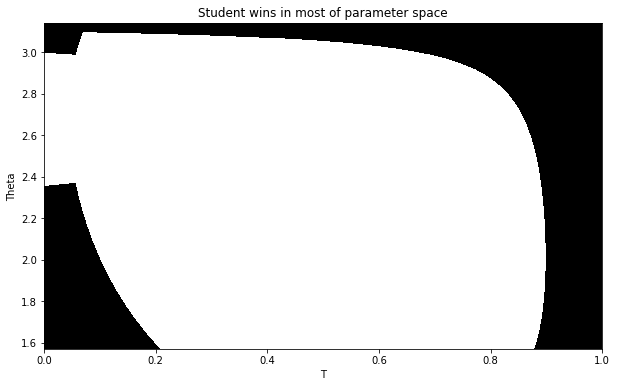

In [3]:
%matplotlib inline
t = np.linspace(0, 1, num=10000)
theta_range = np.linspace(np.pi / 2, np.pi, num=1000)
winner = np.zeros( (len(theta_range), len(t)) )

threshold = ( ((2**0.5)/2) - (2/3) ) / ((2**0.5)/2)

for i, theta in enumerate(theta_range):
    phi = (3 * np.pi / 4 ) - theta
    teacher_turnaround = 1 + 0.5 + (t / 2) - ((1-t)*0.5) * np.tan(phi)
    mask = t >= threshold
    teacher_turnaround[mask] += 6 * (t[mask] - threshold)
    
    teacher_longway = 2 + ((1-t) * 0.5) + ( ((1-t)*0.5) * np.tan(phi) )
    
    teacher = np.minimum(teacher_turnaround, teacher_longway)
    
    student = 3 * ((t*np.sqrt(2)/2) + ((1-t)*0.5) / np.cos(phi))
    winner[i, :] = teacher - student

fig, ax = plt.subplots(figsize=(10,6))
winner[winner < 0] = 0
im = ax.pcolormesh(t, theta_range, winner, cmap='gray')
ax.set(xlabel='T', ylabel='Theta')
fig.colorbar(im)

fig2, ax2 = plt.subplots(figsize=(10,6))
binary = np.zeros(winner.shape)
binary[winner > 0] = 1
ax2.pcolormesh(t, theta_range, binary, cmap='gray')
ax2.set(title='Student wins in most of parameter space',xlabel='T', ylabel='Theta')
plt.show()

# 3D Surface Plot

<IPython.core.display.Javascript object>


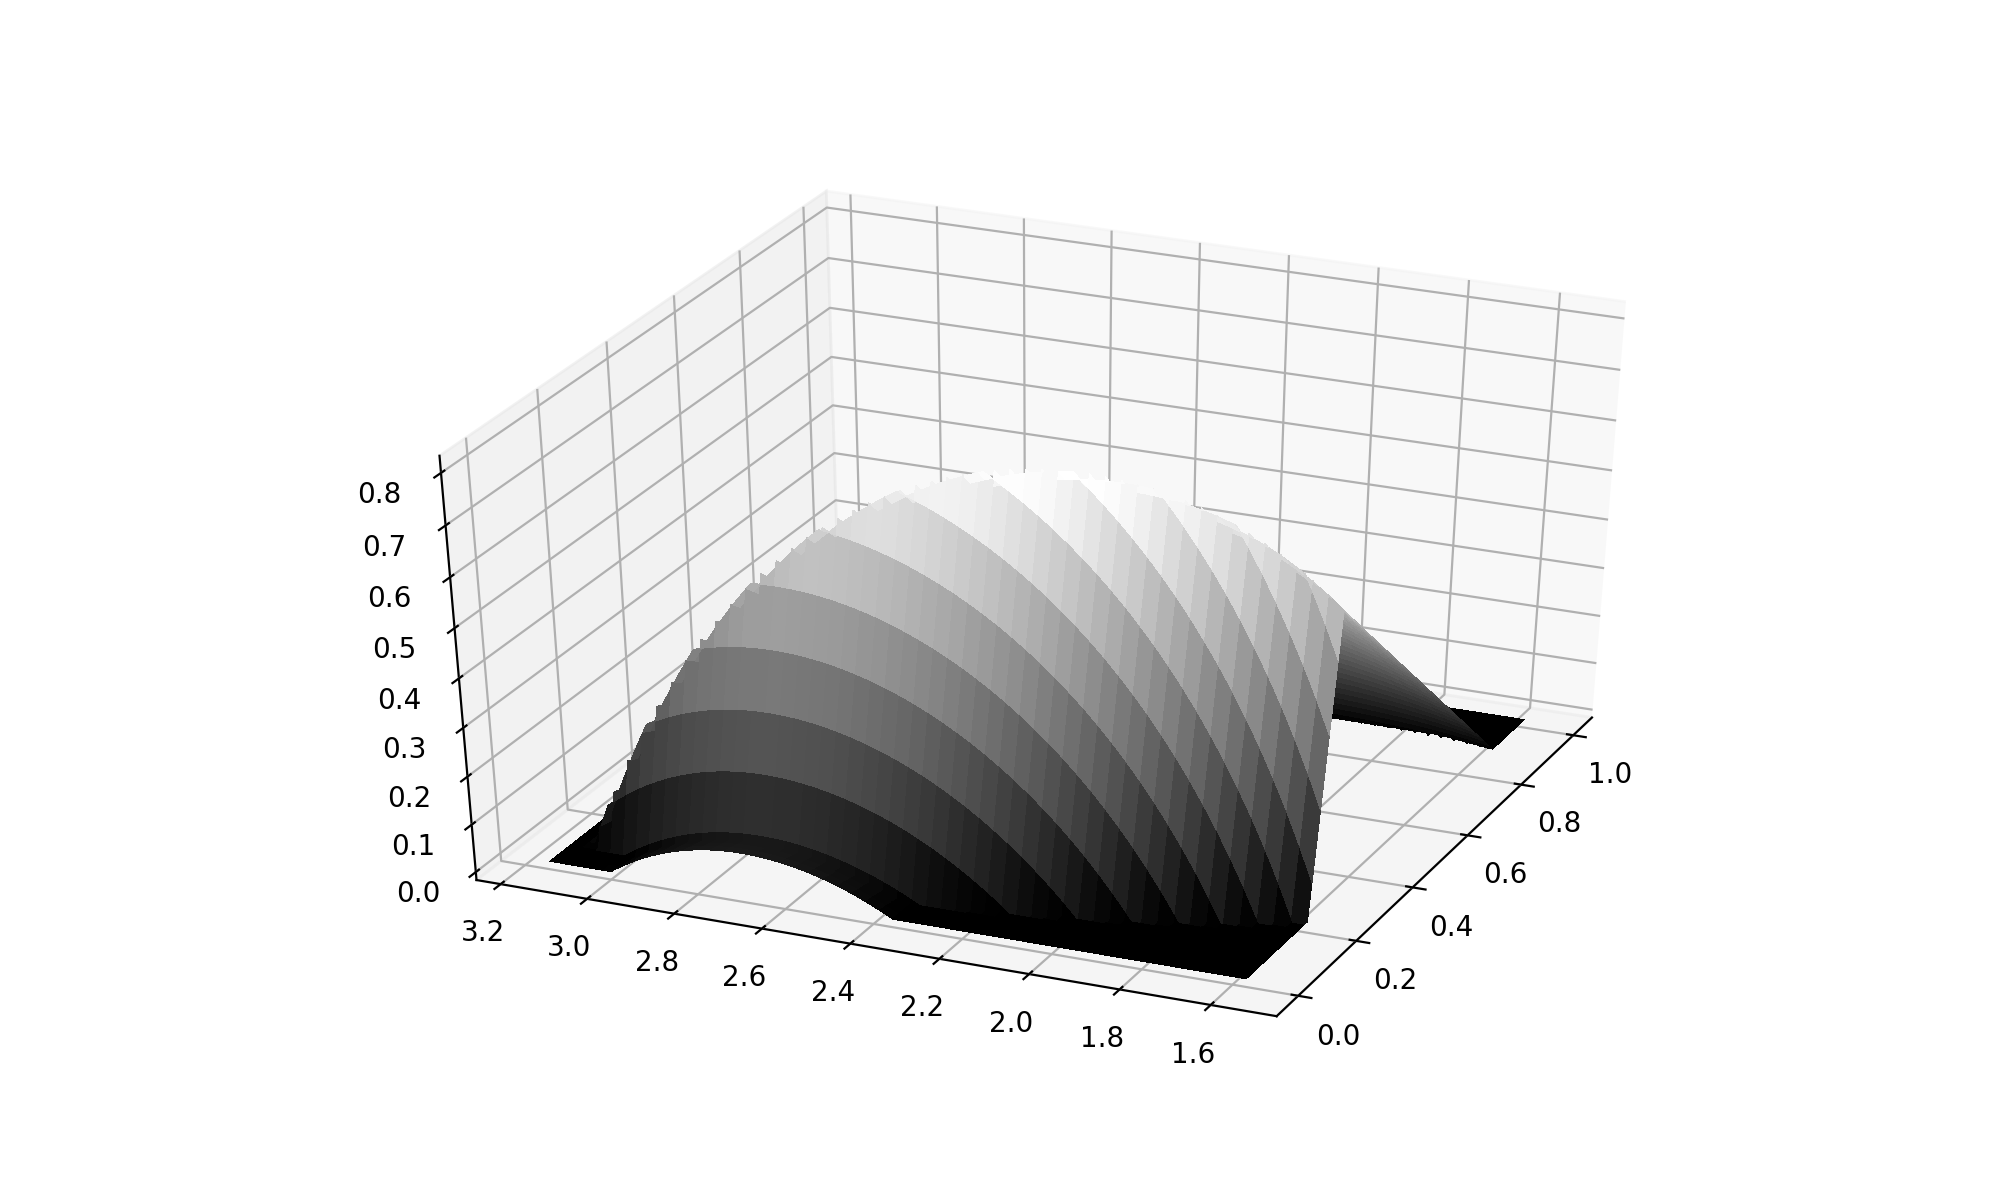

In [4]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
x, y = np.meshgrid(t, theta_range)
surf = ax.plot_surface(x, y, winner, cmap=cm.gray,
                       linewidth=0, antialiased=False)
plt.show()

In [ ]:
np.unravel_index(winner.argmax(), winner.shape)

In [ ]:
theta_range[355], t[2177]